# Factorial Analysis of Mixed Data Analysis 1

In this notebook file, FAMD will be applied to the prepared dataset, 
but there is no method to perform the FAMD operation in the python libraries used.

For this reason, the related process will be carried out with a classical PCA application after a manual preliminary work.

See https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210 for more detail.

In [1]:
#Libraries are being imported
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlibVersion
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import __version__ as sklearnVersion

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlibVersion)
print('Seaborn Version: ' + sns.__version__)
print('sklearn Version: ' + sklearnVersion)

numpy Version: 1.23.5
pandas Version: 1.5.2
matplotlib Version: 3.6.2
Seaborn Version: 0.12.1
sklearn Version: 1.2.0


In [3]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
#A pandas dataframe named as dataFrame is being created by reading the data pkl file created last process
dataFrame = pd.read_pickle("../Data/DataAnalysis/FabricWaste.pkl")
dataFrame.head()

,ProductTypeCategory,ProductType,Maturity,Gender,FabricType,ColorType,CustomerDefinedCategory,IsManualProcess,Red,Green,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
0,Top,T-Shirt,Adult,Female,Single Jersey,SC,Greenish,False,42,47,...,0.064198,4,0,1,1,0,0,6,6,25
1,Top,T-Shirt,Adult,Female,Single Jersey,SC,Orangeish,False,255,229,...,0.060386,0,2,1,0,0,0,3,3,23
2,Top,T-Shirt,Adult,Female,Single Jersey,SC,Bluish,False,173,216,...,0.077121,1,5,2,1,1,1,11,11,30
3,Top,T-Shirt,Adult,Female,Single Jersey,SC,Bluish,False,0,95,...,0.062802,0,4,2,2,0,0,8,8,25
4,Top,T-Shirt,Adult,Female,Single Jersey,SC,Pinkish,False,72,50,...,0.045894,0,3,0,0,0,0,3,3,18


In [5]:
#Information of dataFrame is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductTypeCategory      200 non-null    object 
 1   ProductType              200 non-null    object 
 2   Maturity                 200 non-null    object 
 3   Gender                   200 non-null    object 
 4   FabricType               200 non-null    object 
 5   ColorType                200 non-null    object 
 6   CustomerDefinedCategory  200 non-null    object 
 7   IsManualProcess          200 non-null    bool   
 8   Red                      200 non-null    int64  
 9   Green                    200 non-null    int64  
 10  Blue                     200 non-null    int64  
 11  Pus                      200 non-null    int64  
 12  Fine                     200 non-null    int64  
 13  G/M2                     200 non-null    int64  
 14  Cotton                   2

In [6]:
#Statistical information of dataFrame is being printed
dataFrame.describe()

,Red,Green,Blue,Pus,Fine,G/M2,Cotton,Nylon,Fiber,Linen,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,106.710000,100.380000,113.625000,32.330000,25.210000,171.500000,0.915950,0.001500,0.012800,0.045000,...,0.044340,4.605000,6.440000,0.485000,2.150000,0.235000,0.390000,14.045000,14.305000,21.880000
std,97.684272,92.426451,86.773397,0.744224,3.933607,45.514921,0.228904,0.008551,0.018706,0.207824,...,0.023203,17.502016,8.555253,1.782036,4.618893,1.271953,1.359094,27.749109,27.981005,33.984856
min,-1.000000,-1.000000,-1.000000,32.000000,14.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,3.000000,32.000000,22.000000,125.000000,0.960000,0.000000,0.000000,0.000000,...,0.028531,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,9.000000
50%,94.000000,90.000000,112.000000,32.000000,28.000000,175.000000,1.000000,0.000000,0.000000,0.000000,...,0.038528,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,7.000000,7.000000,14.000000
75%,218.000000,186.250000,200.250000,32.000000,28.000000,190.000000,1.000000,0.000000,0.040000,0.000000,...,0.058106,2.000000,8.000000,0.000000,2.000000,0.000000,0.000000,12.000000,12.250000,20.000000
max,255.000000,255.000000,255.000000,34.000000,28.000000,320.000000,1.000000,0.050000,0.040000,1.000000,...,0.118812,195.000000,86.000000,19.000000,43.000000,15.000000,10.000000,302.000000,303.000000,353.000000


In [7]:
#IsManualProcess boolean feature is being converted to object data type so it can be used as a categorical feature
dataFrame['IsManualProcess'] = dataFrame['IsManualProcess'].astype(np.object_)
dataFrame

,ProductTypeCategory,ProductType,Maturity,Gender,FabricType,ColorType,CustomerDefinedCategory,IsManualProcess,Red,Green,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
0,Top,T-Shirt,Adult,Female,Single Jersey,SC,Greenish,False,42,47,...,0.064198,4,0,1,1,0,0,6,6,25
1,Top,T-Shirt,Adult,Female,Single Jersey,SC,Orangeish,False,255,229,...,0.060386,0,2,1,0,0,0,3,3,23
2,Top,T-Shirt,Adult,Female,Single Jersey,SC,Bluish,False,173,216,...,0.077121,1,5,2,1,1,1,11,11,30
3,Top,T-Shirt,Adult,Female,Single Jersey,SC,Bluish,False,0,95,...,0.062802,0,4,2,2,0,0,8,8,25
4,Top,T-Shirt,Adult,Female,Single Jersey,SC,Pinkish,False,72,50,...,0.045894,0,3,0,0,0,0,3,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Top,T-Shirt,Adult,Male,Single Jersey,S,Stripe,False,-1,-1,...,0.032400,80,29,8,7,4,0,127,128,199
196,Top,T-Shirt,Adult,Female,Ribana,SC,White,False,255,255,...,0.030837,11,8,1,1,0,0,20,21,20
197,Top,Sweatshirt,Adult,Male,Diagonal,SC,Black,False,5,2,...,0.022381,36,24,0,4,0,4,67,68,87
198,Top,Sweatshirt,Adult,Male,Diagonal,SC,Black,False,5,2,...,0.012865,2,6,0,0,0,0,8,8,20


In [8]:
#one hot encoded DataFrame of categorical features is being created with get_dummies method
dummyFrame = pd.get_dummies(dataFrame.loc[:, : 'IsManualProcess'])
dummyFrame

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,CustomerDefinedCategory_MixedColor,CustomerDefinedCategory_Orangeish,CustomerDefinedCategory_Pinkish,CustomerDefinedCategory_Purplish,CustomerDefinedCategory_Reddish,CustomerDefinedCategory_Stripe,CustomerDefinedCategory_White,CustomerDefinedCategory_Yellowish,IsManualProcess_False,IsManualProcess_True
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
196,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
197,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
198,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [9]:
#probability = the number of rows in which the feature is observed / number of rows
#observed value = 1
#not observed value = 0
#dummyFrame.sum() = the number of rows in which the feature is observed for each feature

#dummyProbabilities are being calculated
dummyProbabilities = dummyFrame.sum() / dummyFrame.shape[0]
dummyProbabilities

ProductTypeCategory_Full              0.135
ProductTypeCategory_Leg               0.195
ProductTypeCategory_Top               0.670
ProductType_Coat                      0.005
ProductType_Dress                     0.075
ProductType_Pant                      0.180
ProductType_Pyjamas                   0.060
ProductType_Shirt                     0.005
ProductType_Skirt                     0.015
ProductType_Sweatshirt                0.060
ProductType_T-Shirt                   0.600
Maturity_Adult                        0.685
Maturity_Baby                         0.050
Maturity_Child                        0.265
Gender_Female                         0.680
Gender_Male                           0.100
Gender_Unisex                         0.220
FabricType_Diagonal                   0.035
FabricType_Interlock                  0.035
FabricType_Ribana                     0.085
FabricType_Single Jersey              0.845
ColorType_AOP                         0.165
ColorType_M                     

In [10]:
#Encoded Value = value / Sqrt(dummyProbability)

#categorical features are being encoded
for column in dummyFrame.columns:
    dummyFrame[column] = dummyFrame[column] / math.sqrt(dummyProbabilities[column])
dummyFrame

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,CustomerDefinedCategory_MixedColor,CustomerDefinedCategory_Orangeish,CustomerDefinedCategory_Pinkish,CustomerDefinedCategory_Purplish,CustomerDefinedCategory_Reddish,CustomerDefinedCategory_Stripe,CustomerDefinedCategory_White,CustomerDefinedCategory_Yellowish,IsManualProcess_False,IsManualProcess_True
0,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.017973,0.0
1,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,4.082483,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.017973,0.0
2,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.017973,0.0
3,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.017973,0.0
4,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,2.948839,0.0,0.000000,0.000000,0.000000,0.0,1.017973,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,4.714045,0.000000,0.0,1.017973,0.0
196,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,14.142136,0.0,1.017973,0.0
197,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,4.082483,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.017973,0.0
198,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,4.082483,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.017973,0.0


In [11]:
#Since categorical features are kept in dummyFrame as encoded, they are being removed from dataFrame
dataFrame.drop(dataFrame.loc[:, : 'IsManualProcess'].columns, axis = 1, inplace = True)
dataFrame

,Red,Green,Blue,Pus,Fine,G/M2,Cotton,Nylon,Fiber,Linen,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
0,42,47,35,32,28,125,0.96,0.0,0.04,0.0,...,0.064198,4,0,1,1,0,0,6,6,25
1,255,229,180,32,28,125,0.96,0.0,0.04,0.0,...,0.060386,0,2,1,0,0,0,3,3,23
2,173,216,230,32,28,125,0.96,0.0,0.04,0.0,...,0.077121,1,5,2,1,1,1,11,11,30
3,0,95,106,32,28,125,0.96,0.0,0.04,0.0,...,0.062802,0,4,2,2,0,0,8,8,25
4,72,50,72,32,28,125,0.96,0.0,0.04,0.0,...,0.045894,0,3,0,0,0,0,3,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,-1,-1,32,28,175,1.00,0.0,0.00,0.0,...,0.032400,80,29,8,7,4,0,127,128,199
196,255,255,255,34,18,210,1.00,0.0,0.00,0.0,...,0.030837,11,8,1,1,0,0,20,21,20
197,5,2,3,32,20,320,1.00,0.0,0.00,0.0,...,0.022381,36,24,0,4,0,4,67,68,87
198,5,2,3,32,20,320,1.00,0.0,0.00,0.0,...,0.012865,2,6,0,0,0,0,8,8,20


In [12]:
#dummyFrame is being appended to the beginning of dataFrame 
dataFrame = pd.concat([dummyFrame, dataFrame], axis = 1)
dataFrame

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
0,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.064198,4,0,1,1,0,0,6,6,25
1,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.060386,0,2,1,0,0,0,3,3,23
2,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.077121,1,5,2,1,1,1,11,11,30
3,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.062802,0,4,2,2,0,0,8,8,25
4,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.045894,0,3,0,0,0,0,3,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.032400,80,29,8,7,4,0,127,128,199
196,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.030837,11,8,1,1,0,0,20,21,20
197,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,4.082483,...,0.022381,36,24,0,4,0,4,67,68,87
198,0.0,0.0,1.221694,0.0,0.0,0.0,0.0,0.0,0.0,4.082483,...,0.012865,2,6,0,0,0,0,8,8,20


In [13]:
#Information of dataFrame is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ProductTypeCategory_Full            200 non-null    float64
 1   ProductTypeCategory_Leg             200 non-null    float64
 2   ProductTypeCategory_Top             200 non-null    float64
 3   ProductType_Coat                    200 non-null    float64
 4   ProductType_Dress                   200 non-null    float64
 5   ProductType_Pant                    200 non-null    float64
 6   ProductType_Pyjamas                 200 non-null    float64
 7   ProductType_Shirt                   200 non-null    float64
 8   ProductType_Skirt                   200 non-null    float64
 9   ProductType_Sweatshirt              200 non-null    float64
 10  ProductType_T-Shirt                 200 non-null    float64
 11  Maturity_Adult                      200 non-n

In [14]:
#Statistical information of dataFrame is being printed
dataFrame.describe()

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.367423,0.441588,0.818535,0.070711,0.273861,0.424264,0.244949,0.070711,0.122474,0.244949,...,0.044340,4.605000,6.440000,0.485000,2.150000,0.235000,0.390000,14.045000,14.305000,21.880000
std,0.932388,0.899469,0.575898,1.000000,0.964183,0.907811,0.971969,1.000000,0.994962,0.971969,...,0.023203,17.502016,8.555253,1.782036,4.618893,1.271953,1.359094,27.749109,27.981005,33.984856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028531,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,9.000000
50%,0.000000,0.000000,1.221694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.038528,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,7.000000,7.000000,14.000000
75%,0.000000,0.000000,1.221694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058106,2.000000,8.000000,0.000000,2.000000,0.000000,0.000000,12.000000,12.250000,20.000000
max,2.721655,2.264554,1.221694,14.142136,3.651484,2.357023,4.082483,14.142136,8.164966,4.082483,...,0.118812,195.000000,86.000000,19.000000,43.000000,15.000000,10.000000,302.000000,303.000000,353.000000


In [15]:
#A StandardScaler object is being created
scaler = StandardScaler()

In [16]:
#The StandardScaler object is being trained with the input features of dataFrame,
#and the originals of this data in the dataFrame are updated with their standardized form
dataFrame.loc[:, : 'OrderQuantity'] = scaler.fit_transform(dataFrame.loc[:, : 'OrderQuantity'])
dataFrame

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
0,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,-0.252646,...,0.064198,4,0,1,1,0,0,6,6,25
1,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,-0.252646,...,0.060386,0,2,1,0,0,0,3,3,23
2,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,-0.252646,...,0.077121,1,5,2,1,1,1,11,11,30
3,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,-0.252646,...,0.062802,0,4,2,2,0,0,8,8,25
4,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,-0.252646,...,0.045894,0,3,0,0,0,0,3,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,-0.252646,...,0.032400,80,29,8,7,4,0,127,128,199
196,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,-0.252646,...,0.030837,11,8,1,1,0,0,20,21,20
197,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,3.958114,...,0.022381,36,24,0,4,0,4,67,68,87
198,-0.395056,-0.492175,0.70181,-0.070888,-0.284747,-0.468521,-0.252646,-0.070888,-0.123404,3.958114,...,0.012865,2,6,0,0,0,0,8,8,20


In [17]:
#A PCA object is being defined and fitted with the input features of dataFrame
pca = PCA(n_components = 30)
pca.fit(dataFrame.loc[:, : 'OrderQuantity'])

PCA(n_components=30)

In [18]:
#Explained Variance Ratios of fitted PCA object are being printed
pca.explained_variance_ratio_

array([0.12555132, 0.10929914, 0.09069986, 0.07560243, 0.05948367,
       0.05113248, 0.04560328, 0.03700087, 0.03213748, 0.03107962,
       0.02777891, 0.02417246, 0.02263894, 0.0213136 , 0.02036737,
       0.01949774, 0.01816038, 0.01776562, 0.01774814, 0.01681259,
       0.01552808, 0.0147196 , 0.01402106, 0.01329734, 0.01086281,
       0.01055994, 0.00979406, 0.00839445, 0.00781902, 0.00630669])

In [19]:
#Total Explained Variance Ratio of fitted PCA object is being printed
#This value indicates to what extent the inputs obtained after the PCA process can represent the real inputs
#Although the number of inputs is almost halved, the rate is around 97%

#The number of inputs can be further reduced,
#as a lower rate will generalize the data further and will be sufficient for training
sum(pca.explained_variance_ratio_)

0.9751489681527429

In [20]:
#shape of PCA components is being printed
pca.components_.shape

(30, 58)

In [21]:
#componentDf is being created
#componentDf indicates the coefficients of the inputs used to calculate each Principle Component
componentDf = pd.DataFrame(pca.components_, columns = dataFrame.loc[:, : 'OrderQuantity'].columns)
componentDf

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,Nylon,Fiber,Linen,Hemp,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity
0,0.100600,0.020825,-0.090657,0.035984,0.106725,0.013710,0.026388,0.007693,0.024546,0.185493,...,0.282560,-0.100523,-0.061889,-0.027734,0.197630,0.180581,0.072974,0.022644,-0.034490,0.069315
1,0.128370,0.203697,-0.264927,-0.051355,0.088811,0.181344,0.086215,0.039325,0.090783,-0.103590,...,-0.094023,0.095573,-0.055418,-0.129522,-0.197428,0.074015,0.049310,-0.103224,-0.088432,-0.125921
2,-0.105252,0.046110,0.037639,0.113591,-0.091769,0.044358,-0.049669,0.008838,0.010096,0.159961,...,-0.183775,0.011608,-0.022652,-0.054810,0.110534,0.213969,0.156729,0.335060,0.334184,0.322689
3,-0.078736,0.163570,-0.080603,0.012208,-0.078958,0.179186,-0.025724,-0.049912,-0.033192,0.049016,...,-0.049933,-0.042683,-0.102935,0.008800,0.198775,0.133842,-0.002733,-0.119311,-0.086223,-0.115510
4,0.252666,-0.022655,-0.164535,0.060864,0.088736,-0.034156,0.265151,0.021327,0.034114,0.071222,...,-0.165699,-0.174932,-0.036499,0.128845,0.113220,-0.187827,0.142895,-0.045174,0.016528,-0.055916
5,-0.136830,0.326429,-0.175608,0.016503,0.000131,0.336748,-0.197032,-0.051068,-0.000352,0.015894,...,0.034395,0.255561,0.099094,0.129862,0.155478,0.023958,0.072649,-0.093485,-0.100308,-0.114207
6,-0.094757,-0.112483,0.163641,-0.008072,-0.033880,-0.133549,-0.098771,0.060497,0.055468,0.068766,...,-0.043342,-0.211498,0.319784,0.270323,0.115070,0.123879,0.109150,-0.125360,-0.155838,-0.125222
7,0.022903,0.064013,-0.070582,0.004731,0.119266,0.044557,-0.099320,0.029184,0.067819,0.021184,...,0.000547,0.025528,-0.226723,0.065720,0.018098,0.099735,-0.054348,-0.012590,-0.021247,-0.029364
8,0.156644,0.175140,-0.261413,-0.061307,0.115967,0.175858,0.096782,-0.073730,0.015040,-0.266166,...,-0.009980,-0.194957,0.220722,0.122279,0.002626,-0.043962,-0.160697,0.264507,0.254436,0.233057
9,-0.391344,0.234353,0.086941,-0.069943,-0.386857,0.158610,-0.134056,0.093086,0.262559,-0.053744,...,-0.009069,-0.056652,-0.227030,0.256189,0.000209,0.021477,-0.134171,0.057352,0.059933,0.049350


In [22]:
#Information of componentDf is being printed
componentDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ProductTypeCategory_Full            30 non-null     float64
 1   ProductTypeCategory_Leg             30 non-null     float64
 2   ProductTypeCategory_Top             30 non-null     float64
 3   ProductType_Coat                    30 non-null     float64
 4   ProductType_Dress                   30 non-null     float64
 5   ProductType_Pant                    30 non-null     float64
 6   ProductType_Pyjamas                 30 non-null     float64
 7   ProductType_Shirt                   30 non-null     float64
 8   ProductType_Skirt                   30 non-null     float64
 9   ProductType_Sweatshirt              30 non-null     float64
 10  ProductType_T-Shirt                 30 non-null     float64
 11  Maturity_Adult                      30 non-null

In [23]:
#Statistical information of componentDf is being printed
componentDf.describe()

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,Nylon,Fiber,Linen,Hemp,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.001152,0.040370,-0.033178,0.039343,-0.021774,0.030439,0.022492,0.037035,0.035378,0.012021,...,-0.012210,-0.004030,-0.004909,0.031444,0.028273,0.021013,0.004560,-0.009919,-0.005030,-0.014180
std,0.117374,0.101664,0.095425,0.164099,0.146059,0.113079,0.151413,0.180387,0.175596,0.137611,...,0.083071,0.172723,0.139377,0.129523,0.086140,0.103193,0.183028,0.100698,0.100935,0.098072
min,-0.391344,-0.112483,-0.264927,-0.260177,-0.386857,-0.190748,-0.212312,-0.232737,-0.272100,-0.381310,...,-0.183775,-0.422660,-0.320200,-0.421153,-0.197428,-0.256727,-0.655806,-0.143435,-0.155838,-0.128888
25%,-0.038040,-0.022145,-0.069246,-0.055020,-0.097890,-0.032517,-0.099183,-0.070866,-0.024982,-0.068820,...,-0.052639,-0.064294,-0.061527,-0.026948,-0.009670,-0.003886,-0.118503,-0.061501,-0.076414,-0.072327
50%,0.002294,0.013715,-0.017017,0.014356,-0.027028,0.029760,0.001124,0.008266,0.019793,0.031590,...,-0.002902,0.016238,-0.005206,0.030770,0.027427,0.023925,0.050863,-0.012168,-0.007525,-0.023906
75%,0.065363,0.075409,0.014958,0.071950,0.104374,0.084345,0.111833,0.078949,0.134204,0.110189,...,0.028396,0.091850,0.047217,0.113189,0.070487,0.078780,0.134508,0.019468,0.027981,0.008585
max,0.252666,0.326429,0.163641,0.474388,0.198078,0.336748,0.307265,0.520113,0.476738,0.201157,...,0.282560,0.423641,0.333477,0.270323,0.198775,0.213969,0.245440,0.335060,0.334184,0.322689


<AxesSubplot: >

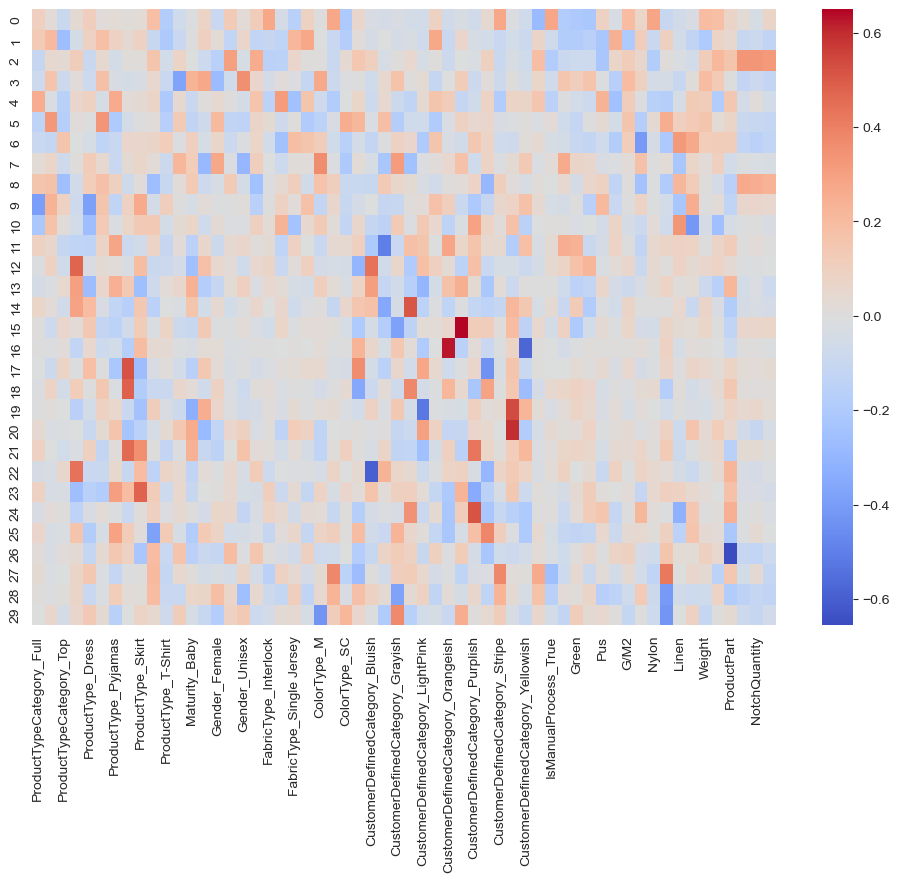

In [24]:
#A Heat Map is being plotted for componentDf
plt.figure(figsize = (12, 8))
sns.heatmap(componentDf, cmap = 'coolwarm')

In [25]:
#The process is being repeated by reducing the number of principal components from 30 to 23
pca = PCA(n_components = 23)
pca.fit(dataFrame.loc[:, : 'OrderQuantity'])

PCA(n_components=23)

In [26]:
#Explained Variance Ratios of fitted PCA object are being printed
pca.explained_variance_ratio_

array([0.12555132, 0.10929914, 0.09069986, 0.07560243, 0.05948367,
       0.05113248, 0.04560328, 0.03700087, 0.03213748, 0.03107962,
       0.02777891, 0.02417246, 0.02263894, 0.0213136 , 0.02036737,
       0.01949774, 0.01816038, 0.01776562, 0.01774814, 0.01681259,
       0.01552808, 0.0147196 , 0.01402106])

In [27]:
#Total Explained Variance Ratio of fitted PCA object is being printed
#This value indicates to what extent the inputs obtained after the PCA process can represent the real inputs
#90% rate is quite enough
sum(pca.explained_variance_ratio_)

0.9081146513263972

In [28]:
#shape of PCA components is being printed
pca.components_.shape

(23, 58)

In [29]:
#componentDf is being created
#componentDf indicates the coefficients of the inputs used to calculate each Principle Component
componentDf = pd.DataFrame(pca.components_, columns = dataFrame.loc[:, : 'OrderQuantity'].columns)
componentDf

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,Nylon,Fiber,Linen,Hemp,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity
0,0.100600,0.020825,-0.090657,0.035984,0.106725,0.013710,0.026388,0.007693,0.024546,0.185493,...,0.282560,-0.100523,-0.061889,-0.027734,0.197630,0.180581,0.072974,0.022644,-0.034490,0.069315
1,0.128370,0.203697,-0.264927,-0.051355,0.088811,0.181344,0.086215,0.039325,0.090783,-0.103590,...,-0.094023,0.095573,-0.055418,-0.129522,-0.197428,0.074015,0.049310,-0.103224,-0.088432,-0.125921
2,-0.105252,0.046110,0.037639,0.113591,-0.091769,0.044358,-0.049669,0.008838,0.010096,0.159961,...,-0.183775,0.011608,-0.022652,-0.054810,0.110534,0.213969,0.156729,0.335060,0.334184,0.322689
3,-0.078736,0.163570,-0.080603,0.012208,-0.078958,0.179186,-0.025724,-0.049912,-0.033192,0.049016,...,-0.049933,-0.042683,-0.102935,0.008800,0.198775,0.133842,-0.002733,-0.119311,-0.086223,-0.115510
4,0.252666,-0.022655,-0.164535,0.060864,0.088736,-0.034156,0.265151,0.021327,0.034114,0.071222,...,-0.165699,-0.174932,-0.036499,0.128845,0.113220,-0.187827,0.142895,-0.045174,0.016528,-0.055916
5,-0.136830,0.326429,-0.175608,0.016503,0.000131,0.336748,-0.197032,-0.051068,-0.000352,0.015894,...,0.034395,0.255561,0.099094,0.129862,0.155478,0.023958,0.072649,-0.093485,-0.100308,-0.114207
6,-0.094757,-0.112483,0.163641,-0.008072,-0.033880,-0.133549,-0.098771,0.060497,0.055468,0.068766,...,-0.043342,-0.211498,0.319784,0.270323,0.115070,0.123879,0.109150,-0.125360,-0.155838,-0.125222
7,0.022903,0.064013,-0.070582,0.004731,0.119266,0.044557,-0.099320,0.029184,0.067819,0.021184,...,0.000547,0.025528,-0.226723,0.065720,0.018098,0.099735,-0.054348,-0.012590,-0.021247,-0.029364
8,0.156644,0.175140,-0.261413,-0.061307,0.115967,0.175858,0.096782,-0.073730,0.015040,-0.266166,...,-0.009980,-0.194957,0.220722,0.122279,0.002626,-0.043962,-0.160697,0.264507,0.254436,0.233057
9,-0.391344,0.234353,0.086941,-0.069943,-0.386857,0.158610,-0.134056,0.093086,0.262559,-0.053744,...,-0.009069,-0.056652,-0.227030,0.256189,0.000209,0.021477,-0.134171,0.057352,0.059933,0.049350


In [30]:
#Information of componentDf is being printed
componentDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ProductTypeCategory_Full            23 non-null     float64
 1   ProductTypeCategory_Leg             23 non-null     float64
 2   ProductTypeCategory_Top             23 non-null     float64
 3   ProductType_Coat                    23 non-null     float64
 4   ProductType_Dress                   23 non-null     float64
 5   ProductType_Pant                    23 non-null     float64
 6   ProductType_Pyjamas                 23 non-null     float64
 7   ProductType_Shirt                   23 non-null     float64
 8   ProductType_Skirt                   23 non-null     float64
 9   ProductType_Sweatshirt              23 non-null     float64
 10  ProductType_T-Shirt                 23 non-null     float64
 11  Maturity_Adult                      23 non-null

In [31]:
#Statistical information of componentDf is being printed
componentDf.describe()

,ProductTypeCategory_Full,ProductTypeCategory_Leg,ProductTypeCategory_Top,ProductType_Coat,ProductType_Dress,ProductType_Pant,ProductType_Pyjamas,ProductType_Shirt,ProductType_Skirt,ProductType_Sweatshirt,...,Nylon,Fiber,Linen,Hemp,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,-0.008670,0.055127,-0.040149,0.051561,-0.015231,0.047320,0.004417,0.034560,0.030125,-0.005220,...,-0.003427,-0.002375,0.011956,0.021492,0.036790,0.027071,0.025941,0.006228,0.006249,0.001185
std,0.132179,0.111028,0.107982,0.170293,0.151424,0.117822,0.138866,0.200791,0.168942,0.109297,...,0.087231,0.116162,0.138920,0.141090,0.089826,0.111609,0.122937,0.107166,0.107385,0.105268
min,-0.391344,-0.112483,-0.264927,-0.156181,-0.386857,-0.133549,-0.212312,-0.232737,-0.272100,-0.266166,...,-0.183775,-0.211498,-0.227030,-0.421153,-0.197428,-0.256727,-0.182441,-0.125360,-0.155838,-0.125921
25%,-0.060325,-0.019721,-0.085630,-0.053798,-0.092164,-0.030877,-0.099046,-0.079740,-0.048335,-0.082205,...,-0.029340,-0.061769,-0.058653,-0.038665,-0.007124,-0.003463,-0.065903,-0.048153,-0.040739,-0.051299
50%,-0.003099,0.020825,-0.054466,0.004731,-0.000987,0.044358,-0.019513,0.007693,0.034114,-0.000347,...,-0.001372,0.011608,-0.003035,0.023180,0.033148,0.034721,0.052416,-0.008939,-0.002963,-0.008676
75%,0.075991,0.126262,0.042735,0.087228,0.102023,0.135448,0.069494,0.062123,0.141103,0.069994,...,0.032524,0.078072,0.066419,0.100903,0.090997,0.090052,0.109248,0.025731,0.025562,0.025147
max,0.252666,0.326429,0.163641,0.474388,0.198078,0.336748,0.282768,0.520113,0.356794,0.185493,...,0.282560,0.255561,0.333477,0.270323,0.198775,0.213969,0.224245,0.335060,0.334184,0.322689


<AxesSubplot: >

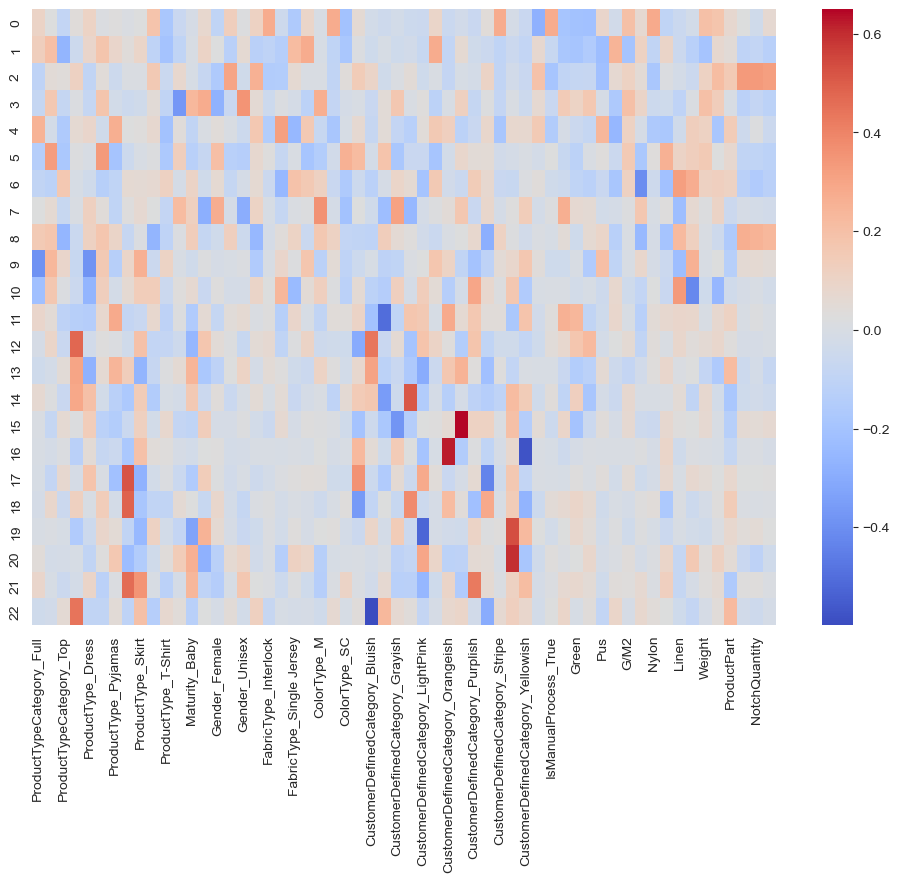

In [32]:
#A Heat Map is being plotted for componentDf
plt.figure(figsize = (12, 8))
sns.heatmap(componentDf, cmap = 'coolwarm')

In [33]:
#PCA operation is being applied to inputs of dataFrame and defined as transformedData
transformedData = pca.transform(dataFrame.loc[:, : 'OrderQuantity'])
transformedData.shape

(200, 23)

In [34]:
#pcaDataFrame is being defined based on transformedData
pcaDataFrame = pd.DataFrame(transformedData, columns = ["PC{:d}".format(x) for x in range(23)])
pcaDataFrame

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,-1.555507,0.420595,0.005030,-1.935320,-1.516163,0.035307,-0.092359,-0.851427,-1.051567,0.095063,...,-0.071144,1.754239,-0.397820,0.360028,-0.286299,0.821498,-0.386176,-0.254110,-0.614607,0.298821
1,-2.808011,-0.943748,-0.850723,-1.189402,-0.863034,-0.256698,-0.974828,0.999649,-0.909815,0.190603,...,0.557494,-0.801390,0.055605,2.811666,-0.311104,0.906764,-0.047559,-0.261902,0.582965,0.729577
2,-2.586685,-0.639300,-0.090313,-1.479553,-1.711759,-0.157235,-1.324735,0.456007,-1.331362,-0.345296,...,1.046962,0.384889,-0.439495,0.434730,-0.233149,-0.391655,0.437094,0.179591,0.023860,-1.992995
3,-1.674960,0.162357,0.287865,-2.126192,-1.501726,0.111705,-0.932359,-0.184961,-1.451265,-0.046914,...,1.526384,0.665066,-0.259269,0.517734,-0.265447,-0.716174,0.236544,0.017159,-0.271201,-2.202634
4,-1.639025,0.537081,-0.098786,-1.501355,-1.505985,0.452858,-0.602762,0.626860,-0.945599,-0.285213,...,1.181667,-0.120009,2.137268,-0.197287,-0.126502,-0.250293,-0.275139,-0.288475,-0.640824,0.494899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4.037243,-3.031604,8.108265,-4.074451,-3.231374,-3.780157,-2.925217,-0.761714,6.327404,2.301534,...,-0.458671,-2.053132,1.616700,-0.106488,0.027780,-0.316902,0.884963,-0.987059,0.228592,0.303252
196,-1.782374,-5.000387,-2.423020,0.128863,3.625688,-0.568848,-2.621846,0.885829,0.450670,2.031638,...,-1.542866,3.652800,3.168193,1.141203,2.399733,2.139282,7.337290,7.579427,1.394987,1.461054
197,4.890469,-4.254453,9.894058,0.160948,3.079117,1.193665,-0.132441,0.041612,-0.683724,-0.855759,...,-0.038304,-0.133005,-0.442532,0.876392,1.903834,-1.634848,0.095863,-0.491553,0.058125,0.695986
198,4.727220,-3.410569,7.272055,1.013242,3.310740,2.009609,0.938951,0.209554,-2.670224,-1.295304,...,0.362076,0.180222,-0.916650,0.875737,1.714032,-1.700579,-0.218381,0.042808,-0.111750,0.945932


In [35]:
#pcaDataFrame inputs and dataFrame outputs are being concatenated
pcaDataFrame = pd.concat([pcaDataFrame, dataFrame.loc[:, 'PrintErrorRate' : ]], axis = 1)
pcaDataFrame

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
0,-1.555507,0.420595,0.005030,-1.935320,-1.516163,0.035307,-0.092359,-0.851427,-1.051567,0.095063,...,0.064198,4,0,1,1,0,0,6,6,25
1,-2.808011,-0.943748,-0.850723,-1.189402,-0.863034,-0.256698,-0.974828,0.999649,-0.909815,0.190603,...,0.060386,0,2,1,0,0,0,3,3,23
2,-2.586685,-0.639300,-0.090313,-1.479553,-1.711759,-0.157235,-1.324735,0.456007,-1.331362,-0.345296,...,0.077121,1,5,2,1,1,1,11,11,30
3,-1.674960,0.162357,0.287865,-2.126192,-1.501726,0.111705,-0.932359,-0.184961,-1.451265,-0.046914,...,0.062802,0,4,2,2,0,0,8,8,25
4,-1.639025,0.537081,-0.098786,-1.501355,-1.505985,0.452858,-0.602762,0.626860,-0.945599,-0.285213,...,0.045894,0,3,0,0,0,0,3,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4.037243,-3.031604,8.108265,-4.074451,-3.231374,-3.780157,-2.925217,-0.761714,6.327404,2.301534,...,0.032400,80,29,8,7,4,0,127,128,199
196,-1.782374,-5.000387,-2.423020,0.128863,3.625688,-0.568848,-2.621846,0.885829,0.450670,2.031638,...,0.030837,11,8,1,1,0,0,20,21,20
197,4.890469,-4.254453,9.894058,0.160948,3.079117,1.193665,-0.132441,0.041612,-0.683724,-0.855759,...,0.022381,36,24,0,4,0,4,67,68,87
198,4.727220,-3.410569,7.272055,1.013242,3.310740,2.009609,0.938951,0.209554,-2.670224,-1.295304,...,0.012865,2,6,0,0,0,0,8,8,20


In [36]:
#Information of pcaDataFrame is being printed
pcaDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PC0                      200 non-null    float64
 1   PC1                      200 non-null    float64
 2   PC2                      200 non-null    float64
 3   PC3                      200 non-null    float64
 4   PC4                      200 non-null    float64
 5   PC5                      200 non-null    float64
 6   PC6                      200 non-null    float64
 7   PC7                      200 non-null    float64
 8   PC8                      200 non-null    float64
 9   PC9                      200 non-null    float64
 10  PC10                     200 non-null    float64
 11  PC11                     200 non-null    float64
 12  PC12                     200 non-null    float64
 13  PC13                     200 non-null    float64
 14  PC14                     2

In [37]:
#Statistical information of pcaDataFrame is being printed
pcaDataFrame.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
count,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-8.881784e-18,0.000000,-7.105427e-17,-2.131628e-16,0.000000,2.131628e-16,-3.552714e-17,1.776357e-16,1.065814e-16,-3.552714e-17,...,0.044340,4.605000,6.440000,0.485000,2.150000,0.235000,0.390000,14.045000,14.305000,21.880000
std,2.705285e+00,2.524125,2.299354e+00,2.099280e+00,1.862093,1.726438e+00,1.630424e+00,1.468617e+00,1.368700e+00,1.345985e+00,...,0.023203,17.502016,8.555253,1.782036,4.618893,1.271953,1.359094,27.749109,27.981005,33.984856
min,-2.868326e+00,-5.000387,-6.817076e+00,-4.074451e+00,-4.098815,-3.780157e+00,-4.049141e+00,-3.645653e+00,-5.631424e+00,-3.583999e+00,...,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,-1.666041e+00,-1.802093,-7.509226e-01,-1.509021e+00,-1.387319,-1.227506e+00,-1.152550e+00,-9.471452e-01,-9.171897e-01,-6.908312e-01,...,0.028531,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,9.000000
50%,-7.179435e-01,-0.199173,-2.306795e-01,-4.752648e-01,-0.649218,-1.235787e-01,-1.744171e-01,2.188559e-01,-5.114022e-02,4.476341e-02,...,0.038528,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,7.000000,7.000000,14.000000
75%,8.028284e-01,1.919508,3.608445e-01,1.141637e+00,1.014746,1.200862e+00,7.288303e-01,9.692604e-01,8.703785e-01,7.383151e-01,...,0.058106,2.000000,8.000000,0.000000,2.000000,0.000000,0.000000,12.000000,12.250000,20.000000
max,1.229565e+01,5.041269,9.894058e+00,6.655812e+00,5.603761,4.509722e+00,4.379899e+00,4.487134e+00,6.327404e+00,3.899776e+00,...,0.118812,195.000000,86.000000,19.000000,43.000000,15.000000,10.000000,302.000000,303.000000,353.000000


In [38]:
#pcaDataFrame is being saved as pkl files
pcaDataFrame.to_pickle("../Data/AnalysisFAMD/FabricWaste.pkl")